$Лабораторная работа$  $№7 $

$Кокляева$ $Мария$ 

$Группа:$ $А-13-22$

$Вариант$ $22$

###### Задача 7.1
Найти приближенное решение задачи Коши






$
\left\{ 
    \begin{array}{l}
        y' = -15y+2.5e^{-0.5t}+12e^{-2t}+10, &\\
        y(0) = 2;
    \end{array} 
\right.
{T = 4}.
$

1.Найти аналитическое решение задачи.
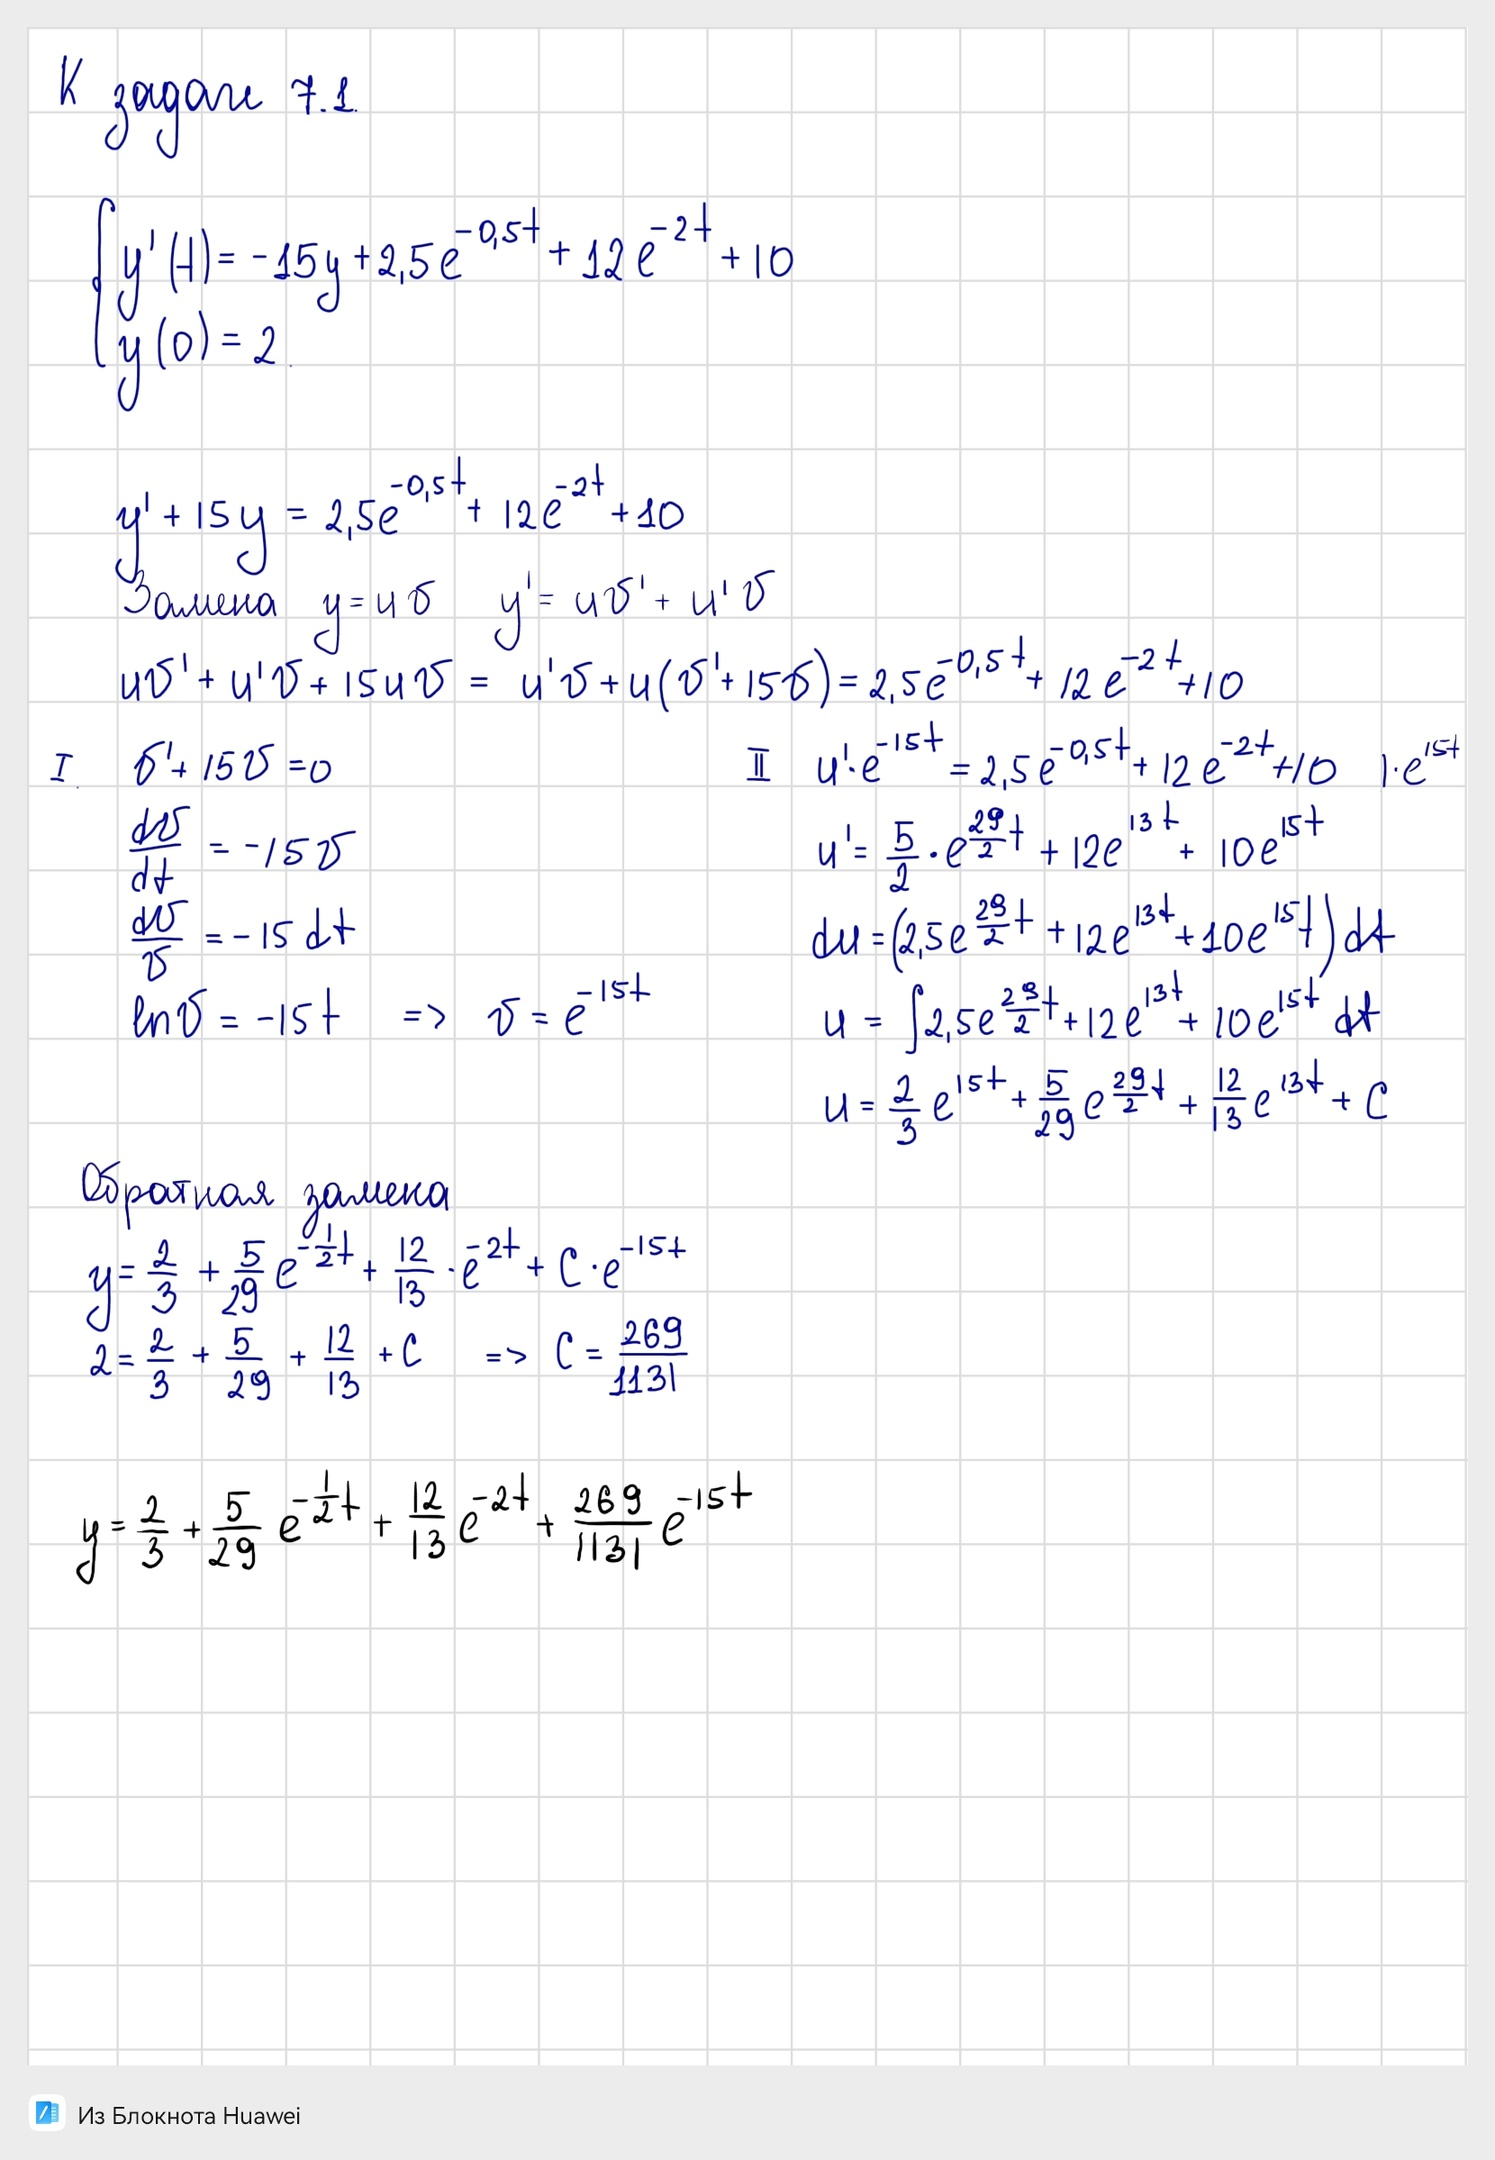

2. Составить программу, реализующую  вычисление приближенного решения по   явному  и неявному методам   Эйлера с заданной точностью. Оценку погрешности производить по правилу Рунге.   Найти решение  с точностью $ε=10^{-4}$ каждым методом.  Определить  с каким шагом по времени достигнута заданная точность в каждом случае. 
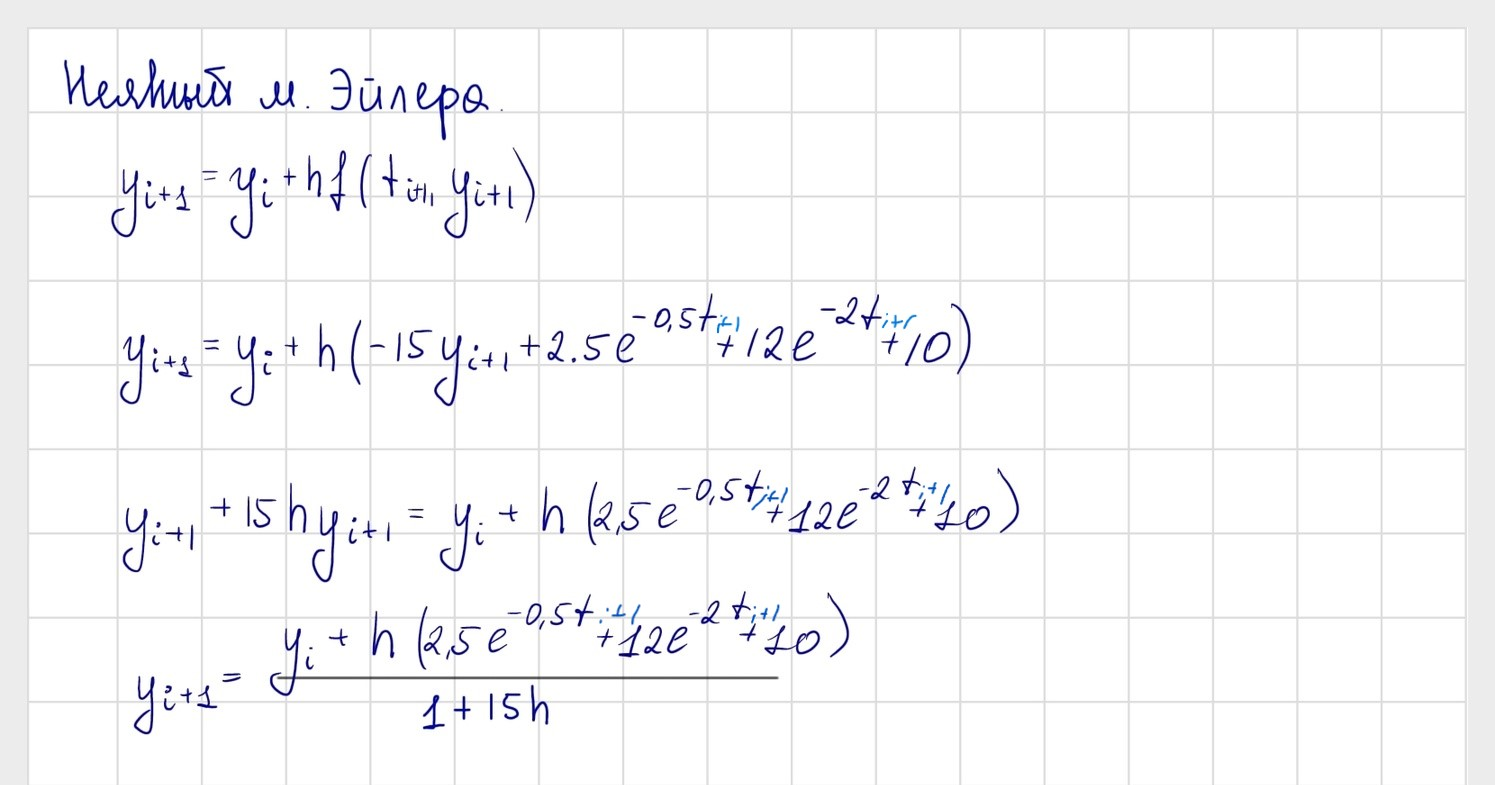

In [18]:
import math
import numpy as np
from matplotlib import pyplot as plt

def f(t,y):
    return -15*y+2.5*math.exp(-0.5*t)+12*math.exp(-2*t)+10

def explicit_Euler(y0, T,f,h):
    n= int(T//h)+1
    t = np.linspace(0,T,n)
    y = np.zeros(n)
    y[0]= y0
    for i in range(n-1):
        y[i+1]=y[i] + h*f(t[i],y[i])
    return y,t

def not_explicit_Euler(y0,T,f,h):
    n= int(T//h)+1
    t = np.linspace(0,T,n)
    y =np.zeros(n)
    y[0] = y0
    for i in range(n-1):
        y[i+1]=(y[i] + h*(f(t[i+1], y[i+1]))) / (1 + 15*h)
    return y, t

def Runge(met, y0, T, f, h,p):
    n = int(T//h)
    t_n,y_2n = met(y0, T,f,h) 
    t_2n,y_n = met(y0, T,f,h/2)
    error = []
    for i in range(n):
        error.append((y_n[2*i+1]-y_2n[i])/(2**p-1))
    return max(error)

def Search(Runge, met,y0,T,f,p,eps):
    n =2
    h = T/n
    er = abs(Runge(met, y0,T,f,h,p))
    while er>eps:
        n +=1
        h = T/n
        er = abs(Runge(met, y0,T,f,h,p))
    return h, n,er

def pprint(h, n, error):
    print(f"Количество точек = {n}")
    print(f"Шаг = {h}")
    print(f"Погрешность по Рунге ={abs(error)}")
    print()

In [19]:
y0 = 2
T = 4
t0 = 0
eps = 10**(-2)

h_E,n_E,er_E = Search(Runge, explicit_Euler,y0,T,f,1,eps)

print("Явный метод Эйлера")
pprint(h_E,n_E, er_E)

eps = 10**(-2)
h_nE,n_nE,er_nE = Search(Runge, not_explicit_Euler,y0,T,f,1,eps)
print("Неявный метод Эйлера")
pprint(h_nE,n_nE, er_nE)


Явный метод Эйлера
Количество точек = 201
Шаг = 0.01990049751243781
Погрешность по Рунге =0.009950248756219082

Неявный метод Эйлера
Количество точек = 201
Шаг = 0.01990049751243781
Погрешность по Рунге =0.009950248756219082



3. Используя встроенную  функцию Python  scipy.integrate.solve_ivp,  найти решение задачи с точностью $ ε=10^{-4}$  ,  используя методы  RK45 и  BDF. Прочтите описание методов  и  разберитесь, к какому  типу относятся эти методы. Проанализируйте, как методы распределяли  узлы  в расчетной  области.

In [20]:
from scipy.integrate import solve_ivp

# RK45' (по умолчанию): Явный метод Рунге-Кутты порядка 5(4) [1]. Погрешность контролируется с точностью 
# четвертого порядка метода,
# но шаги предпринимаются с точностью пятого порядка формула (производится локальная экстраполяция)

# 'BDF': Неявный многоступенчатый метод порядка переменных (от 1 до 5)
#     на основе О формуле обратной дифференцировки для производной приближение


solve_RK45 = solve_ivp(f, (0,4), [2], method="RK45", max_step=0.1, atol = 10**(-4), rtol = 10**(-4))
print(f"Шаг RK45 {len(solve_RK45.t)}")


solve_BDF = solve_ivp(f, (0,4), [2], method="BDF", max_step=0.1, atol = 10**(-4), rtol = 10**(-4))
print(f"Шаг BDF {len(solve_BDF.t)}")

Шаг RK45 43
Шаг BDF 61


In [21]:
def y(t):
    return 2/3 +5/29*math.exp(-0.5*t)+12/13*math.exp(-2*t)+269/1131*math.exp(-15*t)

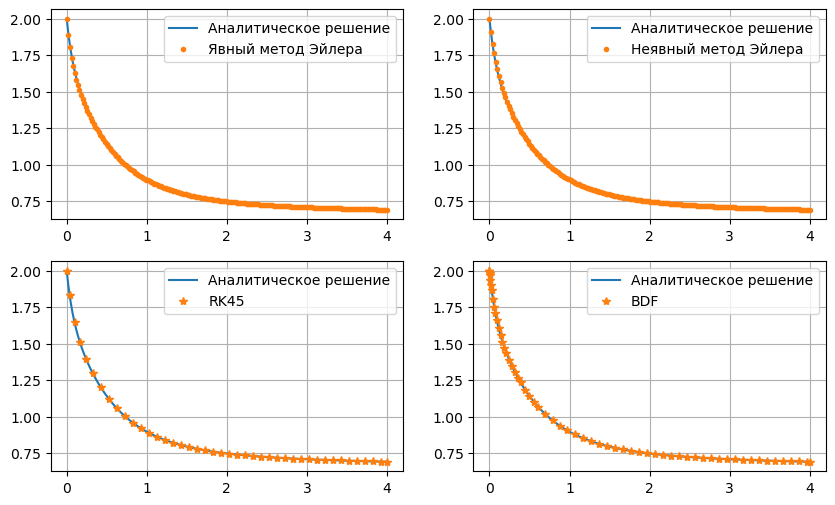

In [22]:
# Строим графики
array_analitic_t = np.linspace(t0,T,1000)
array_analitic_y = np.array([y(array_analitic_t[i]) for i in range(1000)])


y_E,t_E = explicit_Euler(y0, T,f,h_E)
y_nE,t_nE = not_explicit_Euler(y0, T,f,h_nE)


fig,axes =plt.subplots(2,2, figsize = (10,6))
axes[0][0].plot(array_analitic_t,array_analitic_y,label="Аналитическое решение")
axes[0][0].plot(t_E,y_E,'.',label="Явный метод Эйлера")

axes[0][1].plot(array_analitic_t,array_analitic_y,label="Аналитическое решение")
axes[0][1].plot(t_nE,y_nE,'.',label="Неявный метод Эйлера")

axes[1][0].plot(array_analitic_t,array_analitic_y,label="Аналитическое решение")
axes[1][0].plot(solve_RK45.t,solve_RK45.y[0],'*',label="RK45")

axes[1][1].plot(array_analitic_t,array_analitic_y,label="Аналитическое решение")
axes[1][1].plot(solve_BDF.t,solve_BDF.y[0],'*',label="BDF")

axes[0][0].grid()
axes[0][0].legend()
axes[0][1].grid()
axes[0][1].legend()
axes[1][0].grid()
axes[1][0].legend()
axes[1][1].grid()
axes[1][1].legend()

##### Задача 7.2.  Задача Коши для ОДУ  1 порядка следующего вида 

$
\left\{ 
    \begin{array}{l}
        x' = \frac{(a-x)}{a}\ *0.5x-γx, &\\
        x(0) = x_0;
    \end{array} 
\right.
{t>0}.
$

#### 1. Промасштабируем  задачу (7.2),  вводя новые переменные $ y = \frac{x}{a}\ ,  τ= {βt} $  . Тогда  получим задачу: 

$
\left\{ 
    \begin{array}{l}
        y' = y(1-y)-py, &\\
        y(0) = 0.1;
    \end{array} 
\right..
$

где p = $\frac{γ}{β}\ , y_0 = \frac{x_0}{a}  $



$ β = 0.5 ; γ = [0,1] ; y_0 = 0.1 $

Метод решения задачи Коши - Экстраполяционный метод Адамса 4 порядка

Метод вычисления интеграла - Центральных прямоугольников с уточнением по Рунге

 2. (A) Требуется решить задачу Коши (7.3) с помощью встроенной функции Python на отрезке по времени   при минимальном и максимальном значениях параметра   из указанного в задании диапазона. Приближенно определить по графику момент времени, при котором численность популяции становится вдвое больше (меньше) начальной, а также момент времени, начиная с которого численность стабилизируется.

In [23]:
def f_min(t,y):
    return y*(1-y)-p_min*y
def f_max(t,y):
    return y*(1-y)-p_max*y



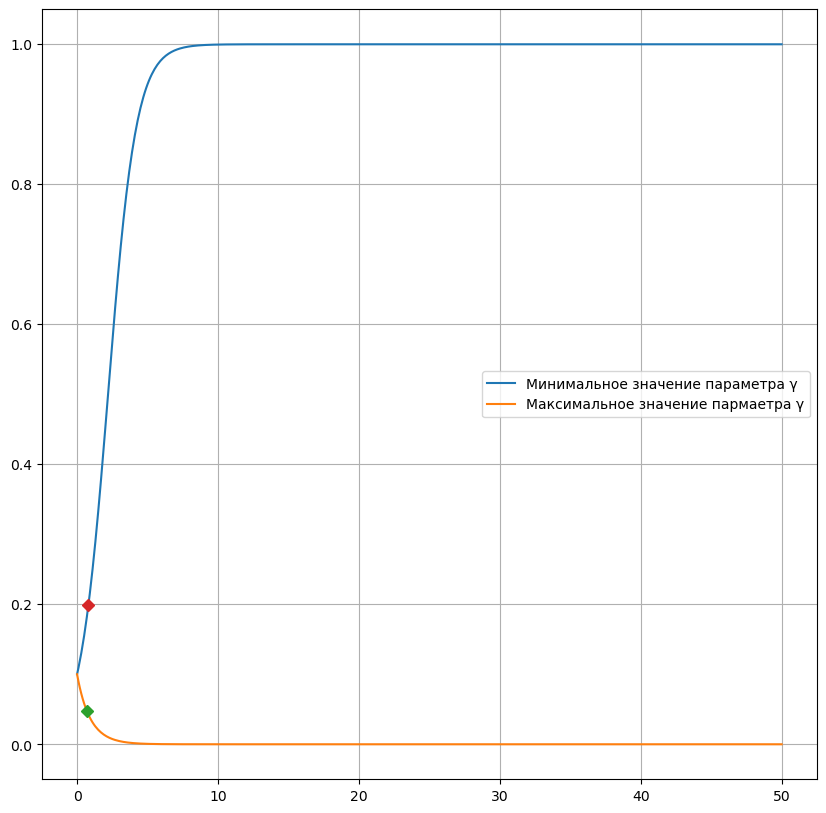

In [24]:
u = [0,1]
b = 0.5
# Для минимального γ
min_u = min(u)
p_min = min_u/b

solve_min = solve_ivp(f_min, (0,50), [0.1], method="RK45", max_step=0.1, atol = 10**(-4), rtol = 10**(-4))

max_u = max(u)
p_max = max_u/b

solve_max = solve_ivp(f_max, (0,50), [0.1], method="RK45", max_step=0.1, atol = 10**(-4), rtol = 10**(-4))

fig,axes =plt.subplots(1,figsize = (10,10))
axes.plot(solve_min.t,solve_min.y[0],label="Минимальное значение параметра γ")
axes.plot(solve_max.t,solve_max.y[0],label="Максимальное значение пармаетра γ")
axes.plot(solve_max.t[7],solve_max.y[0][7], marker='D')
axes.plot(solve_min.t[8],solve_min.y[0][8], marker='D')


axes.grid()
axes.legend()


(B)  Задать множество значений параметра γ , изменяя его на заданном отрезке с шагом 0.1. Для каждого значения параметра найти приближенное решение задачи Коши (7.3) методом , Экстраполяционный метод Адамса 4 порядка, на отрезке [0,50] по времени   с шагом h=0.1.

In [25]:
def f_bio(t,y,p):
    return y * (1-y) -p * y    

In [26]:
def four_ADAMS(f_bio, y0, p, t):
    h = 0.1
    n = len(t)
    y1 = np.zeros(len(t))
    y1[0] = y0
    for i in range(3):
        k1 = h * f_bio(t[i], y1[i],p)
        k2 = h * f_bio(t[i] + h/2, y1[i] + k1/2,p)
        k3 = h * f_bio(t[i] + h/2, y1[i] + k2/2,p)
        k4 = h * f_bio(t[i] + h, y1[i] + k3,p)
        y1[i+1] = y1[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    for i in range(3, n-1):
        y1[i+1] = y1[i] + h/24 * (55 * f_bio(t[i], y1[i],p) - 59 * f_bio(t[i-1], y1[i-1],p) + 37 * f_bio(t[i-2], y1[i-2],p) - 9 * f_bio(t[i-3], y1[i-3],p))
    
    return y1


Значения интеграла V :
gamma=0.0, V=0.0
gamma=0.1, V=0.5763
gamma=0.2, V=0.8204
gamma=0.30000000000000004, V=0.7775
gamma=0.4, V=0.5595
gamma=0.5, V=0.3415
gamma=0.6000000000000001, V=0.2144
gamma=0.7000000000000001, V=0.1534
gamma=0.8, V=0.123
gamma=0.9, V=0.106
gamma=1.0, V=0.09531

Оптимальное значение gamma: 0.20 с V=0.8204


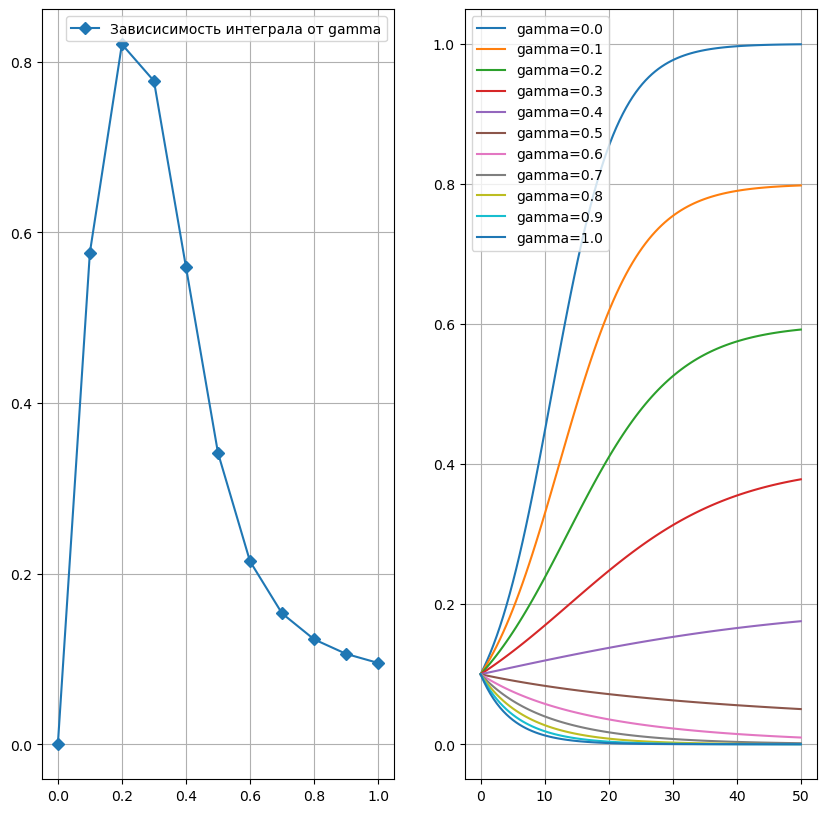

In [27]:
T = 50
h = 0.1
beta = 0.5
gamma_mass = [0,1]
gamma_values = np.arange(gamma_mass[0], gamma_mass[1] + h, h)  

t_values = np.linspace(0,T,100)
V_values = []
y0 = 0.1
y_bio = []
for i in range(len(gamma_values)):
    p = gamma_values[i]/ beta
    y_bio.append(four_ADAMS(f_bio, y0, gamma_values[i]/ beta, t_values))
    V = gamma_values[i] * (h/3) * (y_bio[i][0] + 4 * np.sum(y_bio[i][1:-1:2]) + 2 * np.sum(y_bio[i][2:-2:2]) + y_bio[i][-1]) #считаем интеграл
    V_values.append(V)

max_V = max(V_values)
optimal_gamma = gamma_values[np.argmax(V_values)]

print("Значения интеграла V :")
for i in range(len(gamma_values)):
    print(f"gamma={gamma_values[i]}, V={ V_values[i]:.4}")

print(f"\nОптимальное значение gamma: {optimal_gamma:.2f} с V={max_V:.4f}")

fig,axes =plt.subplots(1,2,figsize = (10,10))
axes[0].plot(gamma_values, V_values,marker='D',label='Зависисимость интеграла от gamma')
axes[0].grid()
axes[0].legend()
#Изменение относительной биомассы y(t) методом Адамса 4 порядка
for i in range(len(y_bio)):
    axes[1].plot(t_values, y_bio[i], label=f'gamma={gamma_values[i]:.1f}')
axes[1].grid()
axes[1].legend()